# Logistic Regression
Classification of species

In [1]:
import pandas as pd
df=pd.read_csv("Fish2.csv")
df.head(2)

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


#### EDA prior Machine Learning

`Data Checking`
1. the data type of each variable
2. how discrete/categorical data is coded (and whether we need to make any changes)
3. how the data are scaled
4. whether there is missing data and how it is coded 
5. whether there are outliers
6. the distributions of continuous features
7. the relationships between pairs of features

#### Check Datatypes

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Species           158 non-null    object 
 1   Weight            158 non-null    float64
 2   Vertical_Length   158 non-null    float64
 3   Diagonal_Length   158 non-null    float64
 4   Cross_Length      158 non-null    float64
 5   Height            158 non-null    float64
 6   Width             158 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


#### Check Categorical Data

For simplicity lets drop some categories that has small obervation(Pike, Smelt, Parkki, Whitefish, Roach)

In [3]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [4]:
# Subset to just Perch, Bream, and Roach species only
df = df[df.Species.isin(['Perch', 'Bream'])]
# verify
print(df.Species.unique())
df.Species.value_counts()

['Bream' 'Perch']


Perch    56
Bream    35
Name: Species, dtype: int64

We will retain Pearch and Bream species.

#### Check Pair Plot
Check the relationship between numeric features

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

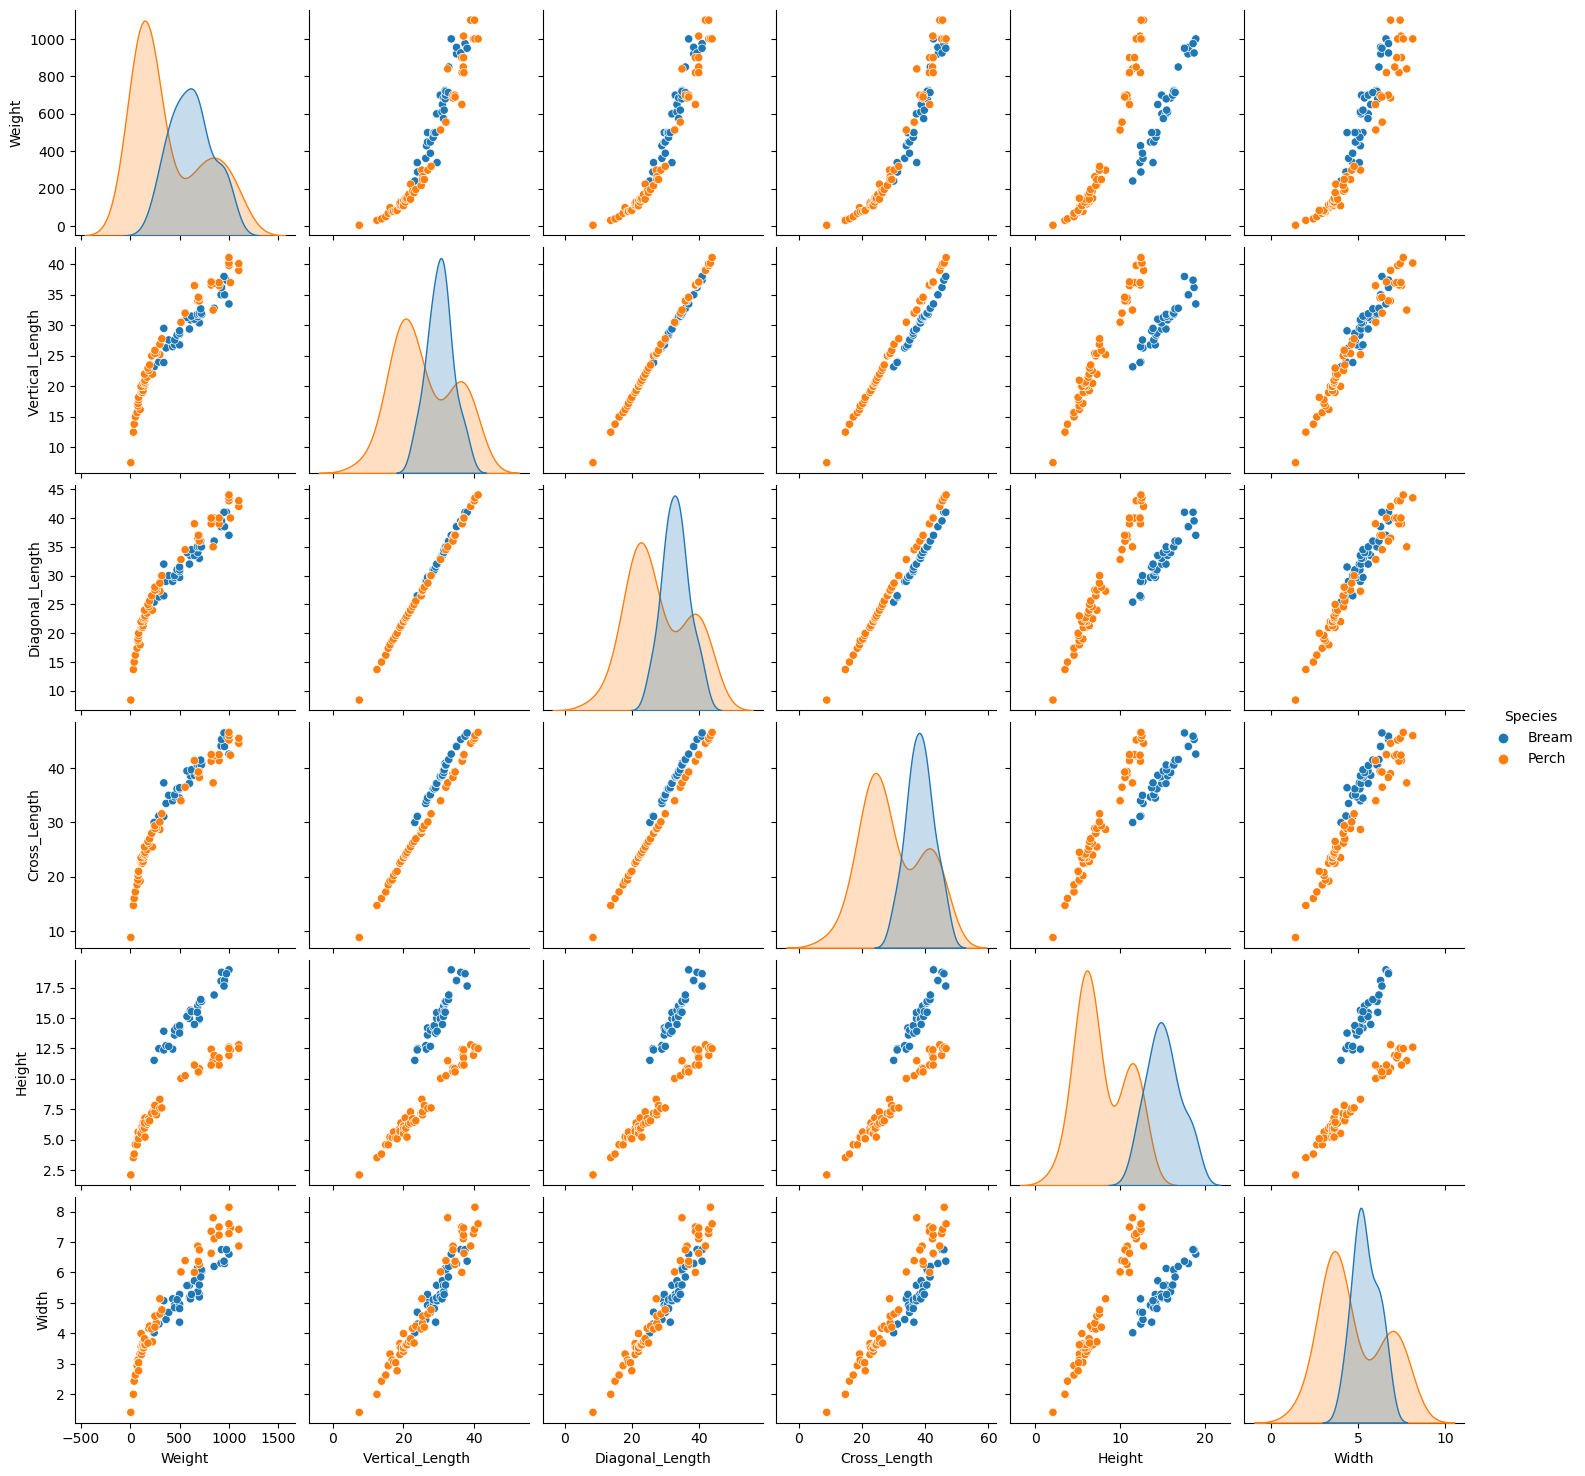

In [6]:
sns.pairplot(df, kind="scatter", hue='Species')
plt.show()

Pairplot shows which features are most associated with certain species. The height and weight seems a good feature choice.

#### Correlation Heatmap
Check for multicolinearity

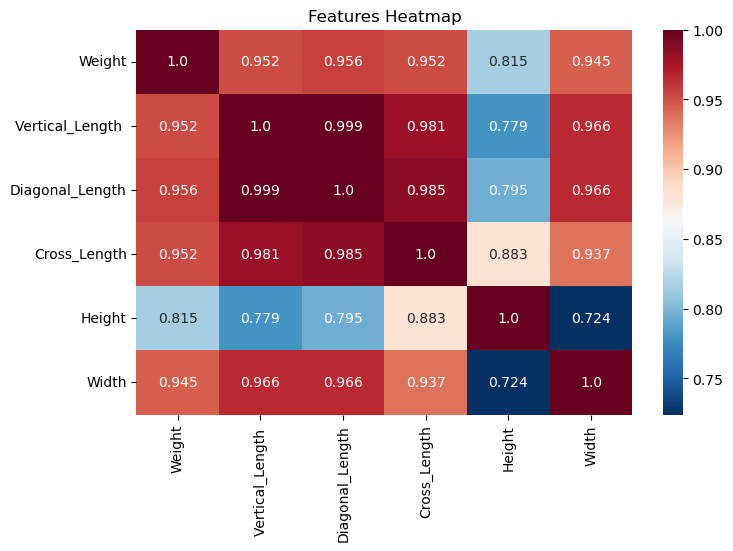

In [7]:
ax2= plt.figure(figsize=(8,5))
ax2=sns.heatmap(df.corr(), annot=True, fmt='.3', cmap='RdBu_r')
plt.title('Features Heatmap')
ax2=plt.show()

There's a lot of multicollineary between our features, we can do nothing and take this all features or we can also drop some features that has less multicollineary.

#### Creating Logistic Regression Model

In [8]:
# define X and y
X = df[['Height', 'Weight']]
y = df['Species']

In [9]:
# split to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size = 0.30, random_state = 0)

In [10]:
# normalize our features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
# intitalize logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

In [12]:
# fir the model
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
# prediction for x_test data
y_pred = lr.predict(x_test)

### Logistic Score Metrics

`Choosing Metrics`
- `Accuracy` We can use accuracy if we have a fairly balance dataset (we can also use binomial hypothesis to test the significant differences between species frequnecy)
- `Recall` number of correct prediction out of total Actual Positive. usecase if we need to reduce the False Negative like in cancer detection, we dont want our model to predict a person to be negative while the truth is positive.
- `Precision` number of positive in Actual out total Positive prediction. i.e in cases we need to reduce the False Positives like in spam detection, we dont want to predict an important mail to be a spam.
- `f1 score` which is the weighted mean of precision and recall

In [46]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# true value vs prediction on training set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
       Perch       1.00      1.00      1.00        17

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [47]:
lr.score(x_test, y_test)

1.0

### Score Matrix

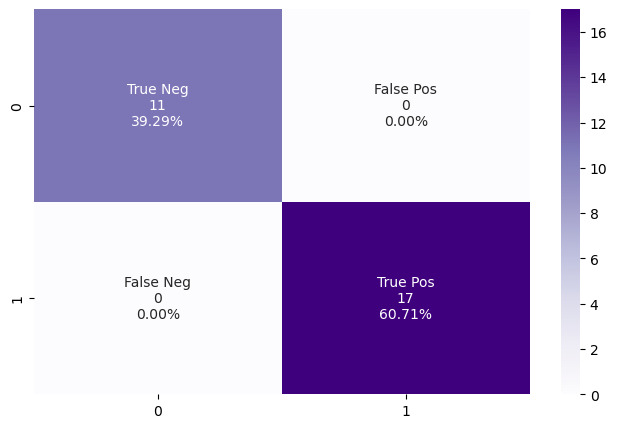

In [48]:
import numpy as np
y_pred = lr.predict(x_test)
model_matrix = confusion_matrix(y_test, y_pred)

# Visualize
fig, ax = plt.subplots(figsize=(8,5))

# setting variables
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in model_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in model_matrix.flatten()/np.sum(model_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(model_matrix, annot=labels, fmt='', cmap='Purples')
plt.show()

Our Model correctly predicted the species type based on 'Height' and 'Weight'.

#### Sample Prediction

In [49]:
# input height and weight
new_fish = [[15, 600]]
# normalize
new_fish = scaler.transform(new_fish)
lr.predict(new_fish)

array(['Bream'], dtype=object)

#### Visualization

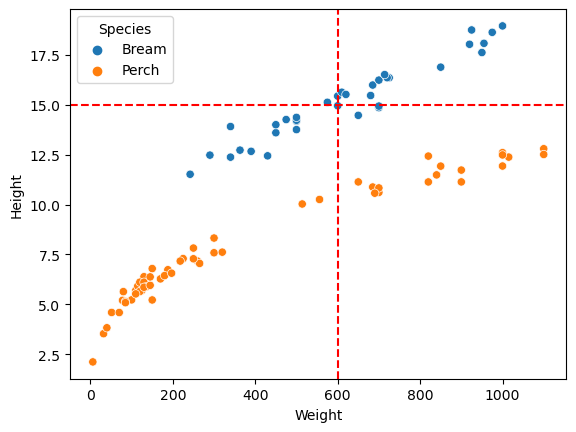

In [201]:
sns.scatterplot(df.Weight, df.Height, hue=df.Species)
plt.axvline(600, linestyle='--', color='r')
plt.axhline(15, linestyle='--', color='r')
plt.show()

***